In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

bank_marketing_uci_path = kagglehub.competition_download('bank-marketing-uci')

print('Data source import complete.')


100%|██████████| 72.8k/72.8k [00:00<00:00, 30.4MB/s]

Extracting files...
Data source import complete.


In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [14]:
!kaggle datasets download kaggle/input/bank-marketing-uci/bank.csv

Invalid dataset specification kaggle/input/bank-marketing-uci/bank.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("bank.csv", delimiter=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
cat_df = df.select_dtypes(include=['object'])

In [6]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        4521 non-null   object
 1   marital    4521 non-null   object
 2   education  4521 non-null   object
 3   default    4521 non-null   object
 4   housing    4521 non-null   object
 5   loan       4521 non-null   object
 6   contact    4521 non-null   object
 7   month      4521 non-null   object
 8   poutcome   4521 non-null   object
 9   y          4521 non-null   object
dtypes: object(10)
memory usage: 353.3+ KB


In [7]:
X = cat_df.iloc[:, :-1].values
y = cat_df.iloc[:,-1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1)

In [9]:
oe= OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

In [11]:
X_train_enc

array([[7., 1., 1., ..., 0., 8., 3.],
       [1., 1., 1., ..., 2., 8., 3.],
       [1., 2., 1., ..., 0., 8., 3.],
       ...,
       [7., 2., 1., ..., 0., 5., 3.],
       [1., 1., 1., ..., 2., 6., 3.],
       [9., 0., 1., ..., 0., 1., 3.]])

In [12]:
X_train

array([['services', 'married', 'secondary', ..., 'cellular', 'may',
        'unknown'],
       ['blue-collar', 'married', 'secondary', ..., 'unknown', 'may',
        'unknown'],
       ['blue-collar', 'single', 'secondary', ..., 'cellular', 'may',
        'unknown'],
       ...,
       ['services', 'single', 'secondary', ..., 'cellular', 'jul',
        'unknown'],
       ['blue-collar', 'married', 'secondary', ..., 'unknown', 'jun',
        'unknown'],
       ['technician', 'divorced', 'secondary', ..., 'cellular', 'aug',
        'unknown']], dtype=object)

In [13]:
y_train

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [14]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [15]:
y_train_enc

array([0, 0, 0, ..., 1, 0, 0])

In [16]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [17]:
def select_features(X_train, y_train, X_test, k_value='all'):
    fs = SelectKBest(score_func=chi2, k=k_value)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [18]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc,
                                            y_train_enc, X_test_enc)

In [19]:
names = []
values = []
for i in range(len(fs.scores_)):
    names.append(cat_df.columns[i])
    values.append(fs.scores_[i])
chi_list = zip(names, values)

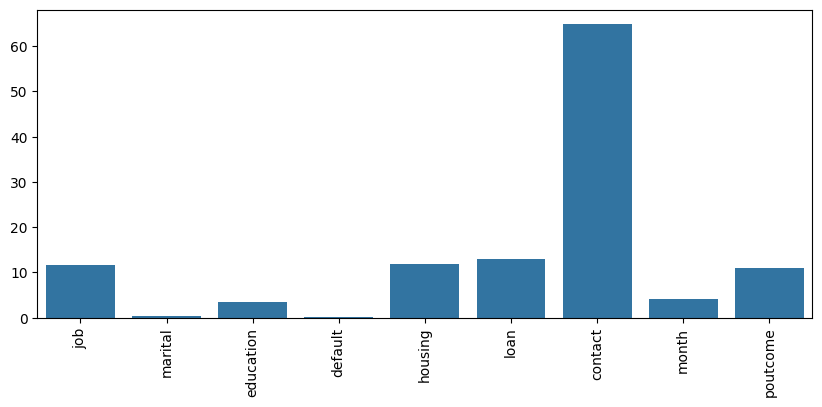

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(x=names, y=values)
plt.xticks(rotation = 90)
plt.show()

In [21]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc,
                                            y_train_enc, X_test_enc, 5)

In [22]:
fs.get_feature_names_out()

array(['x0', 'x4', 'x5', 'x6', 'x8'], dtype=object)

In [23]:
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 11.679248
Feature 1: 0.248626
Feature 2: 3.339391
Feature 3: 0.039239
Feature 4: 11.788867
Feature 5: 12.889637
Feature 6: 64.864792
Feature 7: 4.102635
Feature 8: 10.921719


In [24]:
corr = df.select_dtypes(exclude=['object']).corr()

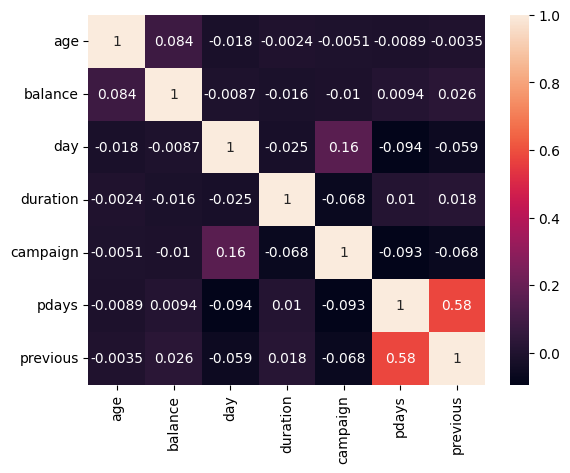

In [25]:
sns.heatmap(corr, annot=True)
plt.show()

days and previous have the strongest correlation of 0.58, and everything else is independent of each other. A correlation of 0.58 isn't very strong. Therefore I will choose to leave both in the model.



In [26]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('cat', OrdinalEncoder(), cat_cols)
    ]
)

In [28]:
preprocessor

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['age', 'balance', 'day', 'duration',
                                  'campaign', 'pdays', 'previous']),
                                ('cat', OrdinalEncoder(),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'poutcome', 'y'])])

In [29]:
# Transform data
X_processed = preprocessor.fit_transform(df)

# Create new DataFrame
all_cols = num_cols + cat_cols  # OrdinalEncoder keeps same col names
df_processed = pd.DataFrame(X_processed, columns=all_cols)

In [30]:
df_processed.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00,10.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,3.0,0.0
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16,7.0,1.0,1.0,0.0,1.0,1.0,0.0,8.0,0.0,0.0
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04,4.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00,4.0,1.0,2.0,0.0,1.0,1.0,2.0,6.0,3.0,0.0
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00,1.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0


In [31]:
df_processed["y"].value_counts()

,count
y,
0.0,4000
1.0,521


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
X= df_processed.iloc[:, :-1]
y= df_processed.iloc[:,-1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [35]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       801
         1.0       0.54      0.32      0.40       104

    accuracy                           0.89       905
   macro avg       0.73      0.64      0.67       905
weighted avg       0.87      0.89      0.88       905

Confusion Matrix:
 [[773  28]
 [ 71  33]]


✅ High accuracy (89%) — but this is misleading because...

⚠️ Recall for class 1 is just 0.32:
Only 32% of actual positives are being detected.

🔻 The model is biased toward predicting 0, which is expected with class imbalance.

In [38]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       801
         1.0       0.56      0.19      0.29       104

    accuracy                           0.89       905
   macro avg       0.73      0.59      0.61       905
weighted avg       0.86      0.89      0.86       905

Confusion Matrix:
 [[785  16]
 [ 84  20]]


Next Step: Try SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [41]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [49]:
y_resampled.value_counts()

,count
y,
0.0,3199
1.0,3199


In [42]:
y_pred = clf.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       801
         1.0       0.47      0.45      0.46       104

    accuracy                           0.88       905
   macro avg       0.70      0.69      0.70       905
weighted avg       0.88      0.88      0.88       905



In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1')
grid.fit(X_resampled, y_resampled)
print(grid.best_params_)

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [45]:
df.y.value_counts()

,count
y,
no,4000
yes,521


In [46]:
best_rf = RandomForestClassifier(
    max_depth=20,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_resampled, y_resampled)
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       801
         1.0       0.47      0.48      0.47       104

    accuracy                           0.88       905
   macro avg       0.70      0.70      0.70       905
weighted avg       0.88      0.88      0.88       905



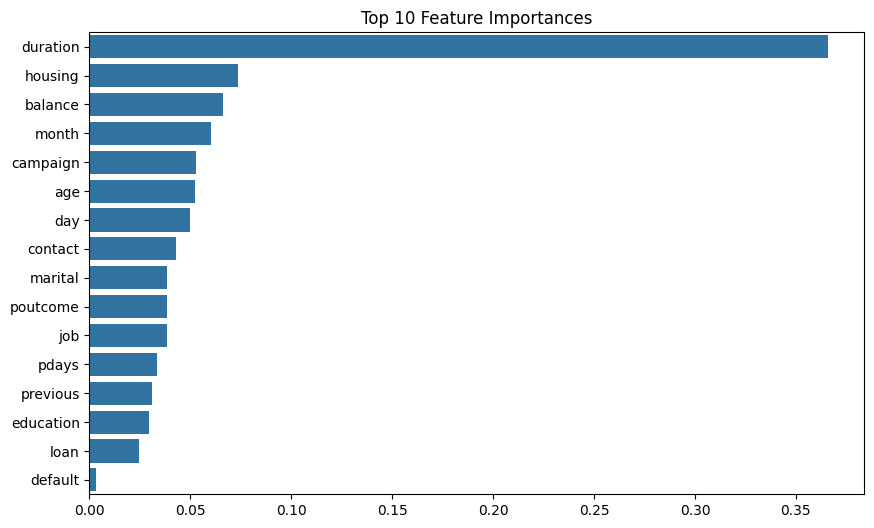

In [47]:
importances = best_rf.feature_importances_
feature_names = X.columns  # Or use encoder.get_feature_names_out() if you used OneHot
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=[feature_names[i] for i in sorted_idx])
plt.title("Top 10 Feature Importances")
plt.show()


In [51]:
df.y.value_counts()

,count
y,
no,4000
yes,521


In [52]:
from collections import Counter
from sklearn.metrics import balanced_accuracy_score

In [ ]:
### Simple Random Forest Classifier

In [53]:
X= df_processed.iloc[:, :-1]
y= df_processed.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(Counter(y_pred))
print(balanced_accuracy_score(y_test, y_pred))

Counter({np.float64(0.0): 858, np.float64(1.0): 47})
0.619641908808133


In [ ]:
### Balanced Weight Random Forest Classifier

In [55]:
rf_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_weighted.fit(X_train, y_train)
y_pred_weighted = rf_weighted.predict(X_test)
print(Counter(y_pred_weighted))
print(balanced_accuracy_score(y_test, y_pred_weighted))

Counter({np.float64(0.0): 875, np.float64(1.0): 30})
0.5844017904559593


In [ ]:
### Upsampling minority class

In [58]:
from sklearn.utils import resample
X_train_np = X_train.values
class_0_indices = [i for i, x in enumerate(y_train) if x == 0]
class_1_indices = [i for i, x in enumerate(y_train) if x == 1]

size_class_0 = sum(y_train==0)
X_train_class_0 = X_train_np[class_0_indices, :]
y_train_class_0 = [0]*size_class_0
X_train_class_1 = X_train_np[class_1_indices, :]

In [59]:
X_train_class_1_resampled = resample(X_train_class_1,
                                  replace=True,
                                  n_samples=size_class_0,
                                  random_state=42)
y_train_class_1 = [1]*size_class_0

In [64]:
X_train_resampled = np.concatenate((X_train_class_0, X_train_class_1_resampled))
y_train_resampled = y_train_class_0 + y_train_class_1

In [65]:
from scipy import sparse
X_train_resampled = sparse.csr_matrix(X_train_resampled)

In [75]:
rf_resampled = RandomForestClassifier(random_state=42)
rf_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = rf_resampled.predict(X_test)
print(Counter(y_pred_weighted))
print(balanced_accuracy_score(y_test, y_pred_resampled))

Counter({np.float64(0.0): 875, np.float64(1.0): 30})
0.6460625142250208


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
### Downsampling Majority class

In [67]:
from sklearn.utils import resample
X_train_np = X_train.values
class_0_indices = [i for i, x in enumerate(y_train) if x == 0]
class_1_indices = [i for i, x in enumerate(y_train) if x == 1]

size_class_1 = sum(y_train==1)
X_train_class_1 = X_train_np[class_1_indices, :]
y_train_class_1 = [1]*size_class_1
X_train_class_0 = X_train_np[class_0_indices, :]
X_train_class_0_downsampled = resample(X_train_class_0,
                                  replace=True,
                                  n_samples=size_class_1,
                                  random_state=42)
y_train_class_0_downsampled = [0]*size_class_1

In [68]:
X_train_downsampled = np.concatenate((X_train_class_1, X_train_class_0_downsampled))
y_train_downsampled = y_train_class_1 + y_train_class_0_downsampled

In [69]:
X_train_downsampled = sparse.csr_matrix(X_train_downsampled)

In [70]:
rf_downsampled = RandomForestClassifier(random_state=42)
rf_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_downsampled = rf_downsampled.predict(X_test)
print(Counter(y_pred_downsampled))
print(balanced_accuracy_score(y_test, y_pred_downsampled))

Counter({np.int64(0): 641, np.int64(1): 264})
0.8399337430139342


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
#### Balanced Bagging Classifier

In [72]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
BBC = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=42)
BBC.fit(X_train, y_train)
BBC_pred = BBC.predict(X_test)
print(Counter(BBC_pred))
print(balanced_accuracy_score(y_test, BBC_pred))

Counter({np.float64(0.0): 719, np.float64(1.0): 186})
0.7967149685152872


In [74]:
print(classification_report(y_test, BBC_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91       807
         1.0       0.39      0.73      0.51        98

    accuracy                           0.85       905
   macro avg       0.68      0.80      0.71       905
weighted avg       0.90      0.85      0.86       905

